<a href="https://colab.research.google.com/github/Aayushktyagi/DeepLearning_Resources/blob/master/Imgae_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Content

*   Load image
*   Image scale conversion
*   Edge Detecion
*   HOG feature 






In [0]:
# Load image 
import cv2
import numpy as np 
import urllib
from matplotlib import pyplot as plt

image = cv2.imread('drive/My Drive/Dataset/lena.png')




In [0]:
def show_image(image):
  if len(image.shape)==3:
    view_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(view_image)
    plt.show()
  else:
    print(len(image.shape))
    plt.imshow(image,cmap = 'gray')
    plt.show()

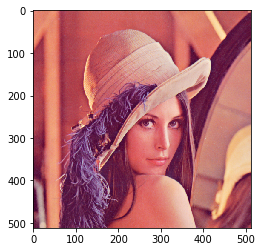

In [4]:
show_image(image)

2


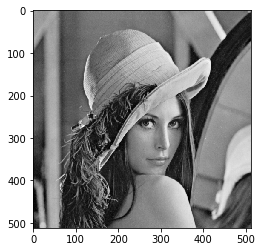

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray)

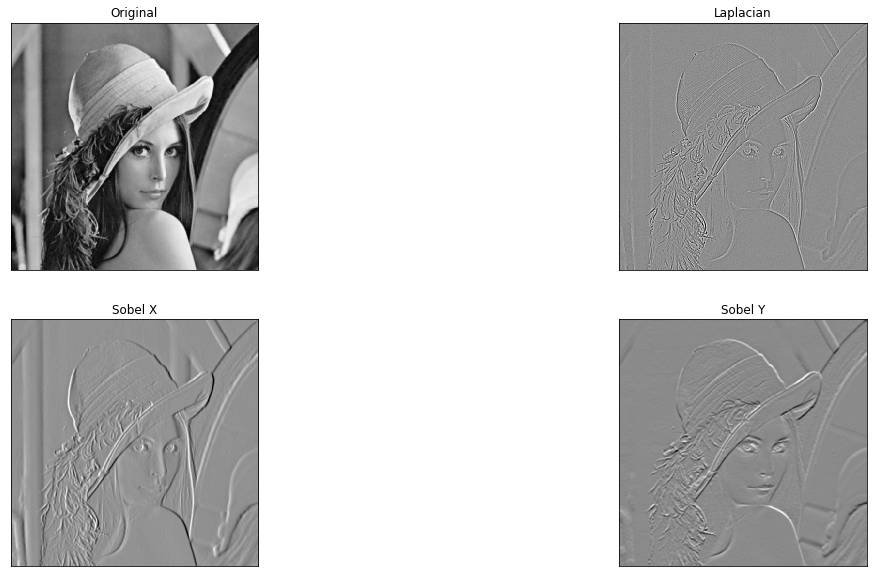

In [6]:
# converting to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y
plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


[0.23663785 0.02625466 0.06131196 ... 0.04256003 0.03466941 0.01075053]


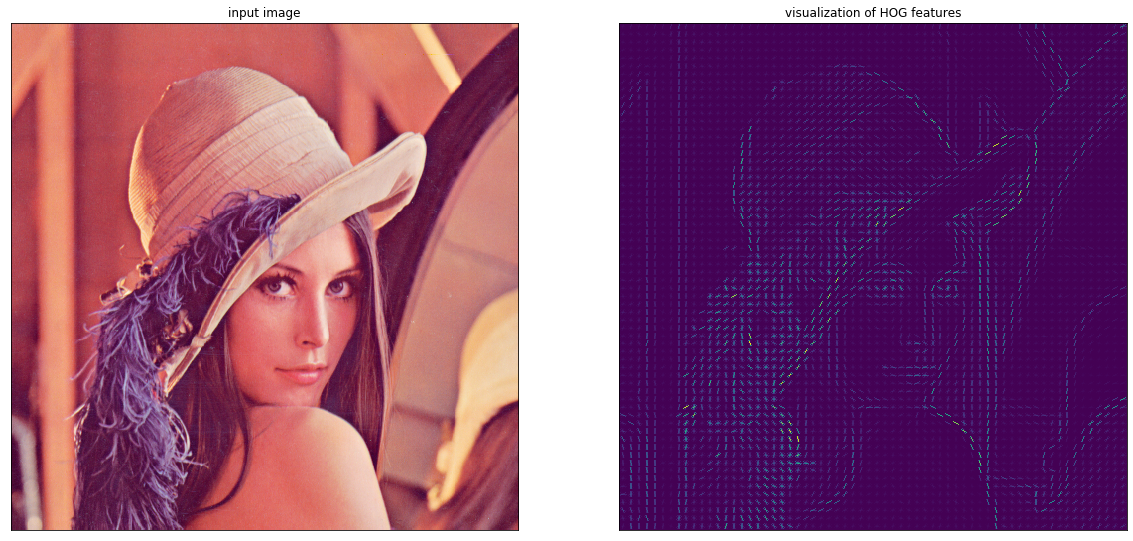

In [7]:
from skimage import data, color, feature
import skimage.data

# image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(gray, visualise=True)
print(hog_vec)

fig, ax = plt.subplots(1, 2, figsize=(20,20),
                       subplot_kw=dict(xticks=[], yticks=[]))
vis_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ax[0].imshow(vis_image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');